![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 19/12/2023
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Se le recomienda levantar un ambiente de `conda` para instalar las librerías y así evitar cualquier problema con las versiones.


In [ ]:
# pip install pyarrow

In [ ]:
# pip install lightgbm

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.2 MB/s eta 0:00:00


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
pip install session_info

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.8 MB/s eta 0:00:00
  Created wheel for session_info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=a58f82c29bc9425308db12116ddae3b7de92dff56787e003cfb35058a3445799
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session_info


In [ ]:
# Libreria Core del Proyecto.
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import time
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna
from optuna.samplers import TPESampler
import shap
import random

# Librerias para pre-procesamiento
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

# Librerias para plotear
from matplotlib import pyplot as plt
import seaborn as sns

# Otras librerias
import warnings
import session_info
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
# session_info.show()

In [ ]:
#montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


# ANÁLISIS DE RIESGO CREDITICIO MEDIANTE MACHINE LEARNING

## Equipo de Trabajo

- Felipe Galaz García
- Mirko Martinic Jara


## Link de repositorio de GitHub

`https://github.com/mmartinicj/MDS7202-labs`

---
## 1. INTRODUCCIÓN
---

El riesgo crediticio se define como la posible pérdida que asume un agente económico (*e.g.* instituciones financieras y bancos) debido al incumplimiento de las obligaciones contractuales que conciernen a las contrapartes con las que el agente se relaciona (Wagner *et al.*, 2002). Dicha pérdida puede ser minimizada a través de la gestión del riesgo *i.e.* evaluar los datos disponibles de las contrapartes para decidir su credibilidad (Thanawala, 2019), con lo cual los agentes económicos se protegen contra el fraude asociado a préstamos impagos.

El objetivo principal del presente proyecto de Data Science consiste en desarrollar un modelo predictivo de riesgo crediticio que le permita al agente económico "Giturra" reducir las posibles pérdidas generadas por contrapartes fraudulentas y, a su vez, mejorar la calidad de los préstamos que otorga, para lo cual se establecen cinco objetivos específicos:

- Explorar el dataset facilitado por el agente económico

- Generar los distintos pasos para preprocesar el dataset

- Crear los modelos de predicción base (baseline)

- Optimizar los hiperparámetros de los mejores baseline

- Explicar cómo los modelos de predicción optimizados toman decisiones

En relación a la información disponible, para el desarrollo del proyecto se dispone del archivo `dataset.pq`, el cual recopila una amplia gama de variables de los clientes de "Giturra" (*e.g.* historiales de crédito, ingresos y otros factores financieros relevantes) como se observa en el bloque de código siguiente.

--

Thanawala, D. (2019). ***Credit Risk Analysis using Machine Learning and Neural Networks***.

Wagner, C., Overbeck, L. & Bluhm, C. (2002). ***An Introduction to Credit Risk Modeling***.

In [ ]:
# path = '/content/drive/MyDrive/Copia de dataset.pq'
path = '/content/drive/MyDrive/Colab Notebooks/dataset.pq'
dataset = pd.read_parquet(path)
dataset.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


Cabe señalar que la salida del modelo predictivo solicitado por el agente económico consiste en un atributo binario denominado como `credit_score` (puntuación de crédito), por lo cual, el análisis expuesto en este trabajo consiste en resolver un problema de clasificación con las etiquetas `credit_score=0` (se otorga el crédito al cliente) y `credit_score=1` (no se otorga el crédito al cliente). Asimismo, se debe notar que la variable objetivo se encuentra desbalanceada (*i.e.* predomina la etiqueta `credit_score=0` por sobre `credit_score=1` como se observa en el bloque de código siguiente), por lo que se opta por utilizar la métrica `Recall` de la categoría minoritaria para evaluar el desempeño del modelo predictivo, enfocando su implementación en la maximización de dicha métrica, la cual le asegurará a "Giturra" que el clasificador sea capaz de encontrar la mayoría de los clientes con la etiqueta `credit_score=1`.

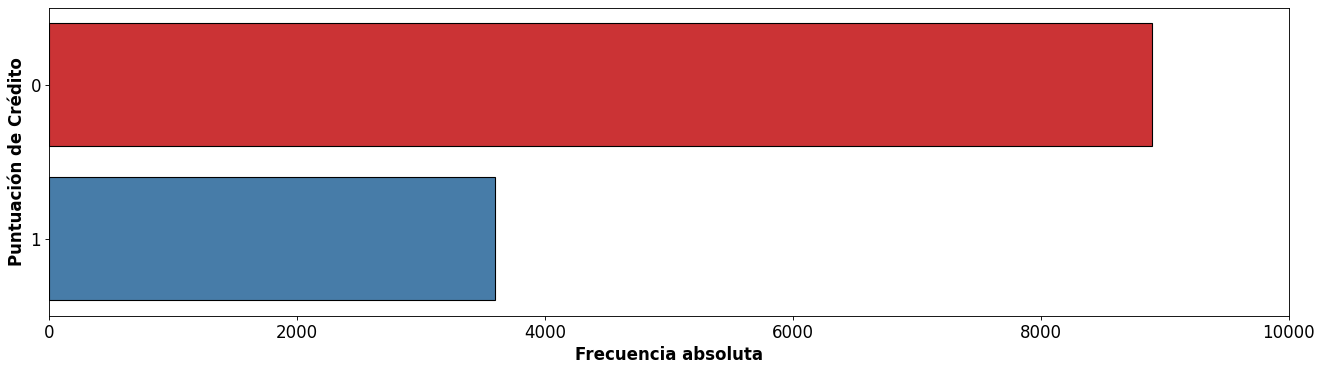

In [ ]:
#generar countplot para variable credit_score
plt.figure(figsize=(20, 5), dpi=80)
sns.countplot(y='credit_score', data=dataset, orient='v', palette='Set1', linewidth=1, edgecolor='k')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tick_params(axis='y', labelsize=10)
plt.locator_params(axis='x', nbins=10)
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0,12000,2000))
plt.xlabel('Frecuencia absoluta', fontweight='bold', fontsize=15)
plt.ylabel('Puntuación de Crédito', fontweight='bold', fontsize=15)
plt.xlim(0,10000)
plt.show() ;

Finalmente, a modo de síntesis de los resultados que se exponen en los capítulos siguientes, se selecciona el modelo `LightGBMClassifier` de la librería `lightgbm` para resolver el problema de clasificación binaria. Dicho modelo consiste en un framework de *gradient boosting* que utiliza algoritmos de aprendizaje basados en árboles de decisión y cuyas ventajas incluyen, entre otras, mayor velocidad de entrenamiento y mejor precisión respecto a otros clasificadores (e.g. `LogisticRegression`, `KNeighborsClassifier` y `SVC`).

En cuanto al preprocesamiento de los datos en el archivo `dataset.pq`, se contempla (1) la corrección de las columnas mal leídas y/o con valores anómalos, (2) la generación de un `ColumnTransformer` que ejecuta la imputación de valores nulos y transforma las variables categóricas y numéricas, y (3) la partición de los datos en conjuntos de entrenamiento (70 %), validación (20 %) y prueba (10 %).

En virtud de los resultados obtenidos sobre el conjunto de prueba (`Recall=0.55`), se considera que estos son aceptables en el sentido que el modelo de predicción implementado logra resolver el problema de clasificación. Sin embargo, la métrica objetivo podría ser mejorada al desarrollar un proceso de *Feature Engineering* para identificar y construir nuevas variables y/o optimizar otros hiperparámetros en el `Pipeline` del modelo (*e.g.* variar el imputador de datos nulos e incorporar técnicas de selección de características).

---
## 2. ANÁLISIS EXPLORATORIO DE DATOS
---

A continuación, se sintetizan los principales hallazgos levantados durante el análisis exploratorio de datos (EDA, por sus siglas en inglés) en `dataset.pq`, incluyendo patrones, tendencias y/o relaciones considerados como relevantes para la generación del modelo predictivo en los capítulos siguientes:


- El Dataset tiene 12500 observaciones y 21 atributos, entre los cuales 18 son variables numéricas y 3 son variables categóricas. Cabe señalar que el archivo facilitado por "Giturra" incluye un atributo adicional, correspondiente a una variable nominal (`customer_id`), que es descartado del análisis puesto que sólo permite identificar a los clientes.


- Las variables numéricas se comportan, en términos generales, según distribuciones *a priori* unimodal con asimetría positiva.


- Las categorías y frecuencias de las TOP-5 variables categóricas son las siguientes:

  - `occupation` Las cinco profesiones más frecuentes entre los clientes de "Giturra" son `_______`, `Lawyer`, `Architect`, `Engineer` y `Accountant` donde se debe notar que aquella con mayor frecuencia de ocurrencia puede ser supuesta como un tipo de valor nulo en la variable.
  
  - `payment_of_min_amount` Sólo existen tres categorías para esta variable, entre las cuales la etiqueta `Yes` tienen la mayor cantidad de ocurrencias (> 50 %) respecto a `No` y `NM`, donde se debe notar que esta última categoría puede ser supuesta como un tipo de valor nulo en la variable.

  - `payment_behaviour` Los cinco comportamientos más frecuentes entre los clientes de "Giturra" son `low_spent_small_value_payments`, `high_spent_medium_value_payments`, `low_spent_medium_value_payments`, `high_spent_large_value_payments` y `high_spent_small_value_payments`, donde se debe notar que existe una categoría minoritaria (`9#%8`) que puede ser supuesta como un tipo de valor nulo en la variable.


- Las variables `monthly_inhand_salary`, `num_of_delayed_payment` `changed_credit_limit`, `num_credit_inquiries`, `credit_history_age` `amount_invested_monthly` y `monthly_balance` poseen valores nulos, totalizando 5328 registros (*i.e.* un 2.0 % respecto al total de observaciones).


- Las variables `age`, `num_bank_accounts` y `num_of_loan` poseen valores negativos que pueden ser considerados como valores anómalos para registros que, por definición, son siempre positivos.


- La variable `monthly_balance` posee un único valor negativo que puede ser considerado como un valor anómalo, por lo cual, el registro asociado es descartado del análisis para evitar la presencia de ruido durante el entrenamiento del modelo predictivo.

---
## 3. PREPARACIÓN DE DATOS
---

A partir de los hallazgos levantados en el capítulo precedente, se construye, en el bloque de código siguiente, un `ColumnTransformer` para la imputación de valores nulos, el preprocesamiento de las variables categóricas y el escalamiento de las variables numéricas. Para ello, inicialmente, se corrigen los atributos `age`, `num_bank_accounts`, `num_of_loan`, `monthly_balance`, `occupation`, `payment_of_min_amount` y `payment_behaviour` según las disposiciones establecidas en el EDA. Luego, se implementa el `ColumnTransformer` y, finalmente, se genera una partición de los datos en conjuntos de entrenamiento (70 %), validación (20 %) y prueba (10 %).

Es importante señalar, en relación al tratamiento de los valores nulos, que estos fueron conservados, pues, al descartarlos del análisis, el tamaño del Dataset se reducía desde 12500 a 7986 registros (*i.e.* una reducción del 36 %). Así, la imputación de los valores nulos consistió en asignar la etiqueta más frecuente para las variables categóricas y la mediana para las variables numéricas.

In [ ]:
# convertimos las columnas mal leidas a sus tipos correspondientes (float, str, etc...)
# corregimos columnas numericas con datos negativos
for c in ['age', 'num_bank_accounts', 'num_of_loan'] :
    dataset.loc[dataset[c]<0, c] = np.nan
# descartamos valor negativo en la columna monthly_balance
dataset = dataset.drop(dataset[dataset.monthly_balance<0].index, axis=0)
# corregimos categorias erroneas en las columnas 'occupation', 'payment_of_min_amount' y 'payment_behaviour'
dataset.occupation = np.where(dataset.occupation=='_______', np.nan, dataset.occupation)
dataset.payment_of_min_amount = np.where(dataset.payment_of_min_amount=='NM', np.nan, dataset.payment_of_min_amount)
dataset.payment_behaviour = np.where(dataset.payment_behaviour=='!@9#%8', np.nan, dataset.payment_behaviour)

# definimos la tipologia de las columnas para el preprocesamiento
cat_cols = [c for c in dataset.drop('customer_id', axis=1).select_dtypes(include='O').columns]
num_cols = [c for c in dataset.drop(cat_cols+['customer_id','credit_score'], axis=1).columns]

# generamos un ColumnTransformer que, ademas de imputar valores nulos, preprocese datos categóricos y escale datos numéricos
preproc = ColumnTransformer(
    transformers=[
        ('cat_pipe',
         Pipeline([('impute', SimpleImputer(strategy='most_frequent')), # imputamos datos nulos
                   ('scaler', OneHotEncoder(sparse=False)), # preprocesamos
                  ]), cat_cols),
        ('num_pipe',
         Pipeline([('impute', SimpleImputer(strategy='median')), # imputamos datos nulos
                   ('scaler', MinMaxScaler()), # escalamos
                  ]), num_cols)
    ], remainder='drop').set_output(transform="pandas")

# probamos las transformaciones utilizando fit_transform
test = preproc.fit_transform(dataset)
display(test.head())

# ejecutamos train_test_split para generar un conjunto de entrenamiento (70%), validación (20%) y de prueba (10%)
X = dataset[cat_cols+num_cols]
y = dataset.credit_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-.7, stratify=y, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.1/(.1+.2), stratify=y_test, random_state=123)

,cat_pipe__occupation_Accountant,cat_pipe__occupation_Architect,cat_pipe__occupation_Developer,cat_pipe__occupation_Doctor,cat_pipe__occupation_Engineer,cat_pipe__occupation_Entrepreneur,cat_pipe__occupation_Journalist,cat_pipe__occupation_Lawyer,cat_pipe__occupation_Manager,cat_pipe__occupation_Mechanic,...,num_pipe__delay_from_due_date,num_pipe__num_of_delayed_payment,num_pipe__changed_credit_limit,num_pipe__num_credit_inquiries,num_pipe__outstanding_debt,num_pipe__credit_utilization_ratio,num_pipe__credit_history_age,num_pipe__total_emi_per_month,num_pipe__amount_invested_monthly,num_pipe__monthly_balance
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111111,0.002095,0.408652,0.001566,0.162020,0.136411,0.545455,0.000605,0.002479,0.244458
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111111,0.001629,0.274045,0.000783,0.121012,0.456709,0.818182,0.000230,0.021890,0.243059
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.180556,0.002095,0.312701,0.001175,0.260669,0.650342,0.545455,0.003013,1.000000,0.611662
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.125000,0.002793,0.195122,0.001566,0.126501,0.257366,0.515152,0.000200,0.012562,0.258871
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.083333,0.004190,0.208698,0.001566,0.188808,0.205066,0.939394,0.000000,0.018133,0.248473


---
## 4. BASELINE
---

De manera preliminar a la construcción de los modelos de predicción base (baseline), se crea la función `train_model` para automatizar el proceso de implementación, entrenamiento y evaluación de un `Pipeline` que resuelva el problema de clasificación dados (1) los conjuntos de entrenamiento (`X_train`, `y_train`) y validación (`X_val`, `y_val`), (2) un clasificador (`clf`) y (3) una métrica de evaluación (`eval_metric`).

In [ ]:
def train_model(X_train, y_train, X_val, y_val, clf=DummyClassifier, eval_metric=recall_score, random_state=123) :

    '''

    La función implementa, entrena y evalúa un Pipeline para resolver el problema de clasificación
    dado un modelo especificado por el usuario

    Parameters
    ----------
    X_train, y_train : pandas.DataFrame, pandas.Series
        Conjunto de entrenamiento
    X_val, y_val : pandas.DataFrame, pandas.Series
        Conjunto de validación
    clf : obj, default DummyClassifier
        Modelo de clasificación
    eval_metric : obj, default recall_score
        Métrica de evaluación sobre las predicciones del modelo
    random_state : int, default 123
        Semilla para inicializar el generador interno de números aleatorios

    Returns
    -------
    results_val : float
        Metrica de evaluación sobre las predicciones del modelo
    execution_time : float
        Tiempo de ejecución para el entrenamiento del modelo

    '''

    # imponemos restricciones sobre los parametros
    if clf == DummyClassifier :
        params = {'strategy':'stratified', 'random_state':random_state}
    elif clf == LogisticRegression :
        params = {'random_state':random_state}
    elif clf == DecisionTreeClassifier :
        params = {'random_state':random_state}
    elif clf == SVC :
        params = {'random_state':random_state}
    elif clf == RandomForestClassifier :
        params = {'random_state':random_state}
    elif clf == LGBMClassifier :
        params = {'random_state':random_state, 'verbose':-1}
    elif clf == XGBClassifier :
        params = {'random_state':random_state}
    else :
        params = {}

    # implementmos el pipeline
    pipe = Pipeline([('preproc', preproc), # preprocesamos los datos
                     ('clf', clf(**params)), # implementamos el clasificador
                    ])

    # ajustamos el modelo y calculamos tiempo del proceso
    start_time = time.time()
    results = pipe.fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time

    # realizamos las predicciones con el modelo
    y_pred = results.predict(X_val)

    # imprimimos el reporte de clasificacion
    print()
    print(classification_report(y_val, y_pred))

    # guardamos la metrica objetivo
    results_val = eval_metric(y_val, y_pred)
    return results_val, execution_time

A continuación, se ejecuta la función `train_model` para los siguientes ocho clasificadores:

- `DummyClassifier`
- `LogisticRegression`
- `KNeighborsClassifier`
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier`
- `LGBMClassifier`
- `XGBClassifier`

Los resultados de los baseline se detallan a través de los reportes de clasificación para el conjunto de validación.

In [ ]:
# generamos una lista con el nombre de los modelos y otro para almacenar el desempeño de los modelos
models = [DummyClassifier, LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier,
          SVC, RandomForestClassifier, LGBMClassifier, XGBClassifier]
models_name = ['DummyClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
              'SVC', 'RandomForestClassifier', 'LGBMClassifier', 'XGBClassifier']
ranking = []
timing = []

# ejecutamos la funcion para cada modelo y guardamos los resultados
for clf, clf_name in zip(models, models_name) :
    print('- \033[1m', clf_name, ' \033[0m')
    val1, val2 = train_model(X_train, y_train, X_val, y_val, clf=clf)
    ranking.append(round(val1, 3))
    timing.append(round(val2, 3))

-  DummyClassifier  

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1780
           1       0.27      0.27      0.27       720

    accuracy                           0.58      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.58      0.58      0.58      2500

-  LogisticRegression  

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1780
           1       0.60      0.36      0.45       720

    accuracy                           0.75      2500
   macro avg       0.69      0.63      0.64      2500
weighted avg       0.73      0.75      0.72      2500

-  KNeighborsClassifier  

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1780
           1       0.55      0.40      0.46       720

    accuracy                           0.73      2500
   macro avg       0.66      0.63      0.64      2500


Por último, la tabla del bloque de código siguiente sintetiza los resultados del desempeño de los Baseline sobre el conjunto de validación, notando que aquellos dos clasificadores con el mejor desempeño, en términos de la métrica objetivo considerada en este trabajo, son `LGBMClassifier` (`Recall=0.544`) y `RandomForestClassifier` (`Recall=0.522`).

In [ ]:
# visualizamos los resultados de los modelos ordenados segun desempeño
summary = pd.DataFrame({'model':models_name, 'eval_metric':ranking, 'execution_time':timing})
summary = summary.sort_values(by='eval_metric', ascending=False).reset_index(drop=True)
summary

,model,eval_metric,execution_time
0,LGBMClassifier,0.544,0.282
1,RandomForestClassifier,0.522,2.011
2,XGBClassifier,0.514,0.433
3,DecisionTreeClassifier,0.483,0.229
4,KNeighborsClassifier,0.404,0.074
5,LogisticRegression,0.356,0.316
6,SVC,0.349,3.596
7,DummyClassifier,0.272,0.057


En virtud de los resultados obtenidos, se desprenden las siguientes observaciones:

- Todos los clasificadores se desempeñan mejor que el modelo `DummyClassifier` *i.e.* son mejores que el azar.


- Como se indicó anteriormente, el mejor clasificador entrenado corresponde al modelo `LGBMClassifier` (`Recall=0.544`), seguido por los modelos `RandomForestClassifier` (`Recall=0.522`) y `XGBClassifier` (`Recall=0.514`).


- El desempeño del modelo `LGBMClassifier` se debe a las ventajas que este posee y que han sido reportadas por varios autores (*e.g.* Machado *et al.*, 2019; Yu, 2019; Osman *et al.*, 2021; Chen *el al.*, 2023), entre las cuales destaca que este posee mejor *accuracy* que cualquier otro algoritmo de *boosting*, produciendo árboles de decisión mucho más complejos al seguir un enfoque de división por hojas (*leaf wise split approach*).


- Si bien podría sostenerse que aquellos modelos con buen desempeño respecto al azar y pocos parámetros deberían ser utilizado para experimentar (*e.g.* los modelos `KNeighborsClassifier`, `LogisticRegression` y `SVC`), se utilizan igualmente los modelos `LGBMClassifier` y `RandomForestClassifier` para optimizar sus hiperparámetros, acotando la grilla de optimización de manera tal que dicho proceso se extienda por un lapso de tiempo razonable en relación a los objetivos fijados para este trabajo.

--

Chen, H., Li, X., Feng, Z., Qin, Y., Skibniewski, M., Chen, Z. & Liu, Y. (2023). ***Shield attitude prediction based on Bayesian-LGBM machine learning***.

Machado, M., Karray, S. & Sousa, I. (2019). ***LightGBM: an Effective Decision Tree Gradient Boosting Method to Predict Customer Loyalty in the Finance Industry***.

Osman, M., He, J., Mokbal, F., Zhu, N. & Qureshi, S. (2021). ***ML-LGBM: A Machine Learning Model based on Light Gradient Boosting Machine for the Detection of Version Number Attacks in RPL-Based Networks***.

Yu, X. (2019). ***Light Gradient Boosting Machine: An efficient soft computing model for estimating daily reference evapotranspiration with local and external meteorological data***.

---
## 5. OPTIMIZACIÓN DE MODELOS
---

Los siguientes dos bloques de código generan los estudios en `Optuna` para optimizar los hiperpárametros de los modelos predictivos `RandomForestClassifier` y `LGBMClassifier`, los cuales presentaron los mejores resultados durante el entrenamiento de los baseline.

In [ ]:
# definimos la funcion objetivo para el segundo modelo
def objective(trial, random_state=123):

    # definimos parametros a optimizar para RandomForestClassifier
    params_RandomForestClassifier = {
        # 'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 1e-8, 0.1, log=True),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        # 'n_jobs': -1,
        'random_state': random_state
        }

    # definimos parametros a optimizar para OneHotEncoder
    params_OneHotEncoder = {
        'min_frequency': trial.suggest_float('min_frequency', 1e-8, 1.0, log=True),
        'sparse':False
        }

    # implementmos el pipeline
    pipe = Pipeline([
        ('preproc', ColumnTransformer(
        transformers=[
            ('cat_pipe',
             Pipeline([('impute', SimpleImputer(strategy='most_frequent')), # imputamos datos nulos
              ('scaler', OneHotEncoder(**params_OneHotEncoder)), # preprocesamos
                       ]), cat_cols),
            ('num_pipe',
             Pipeline([('impute', SimpleImputer(strategy='median')), # imputamos datos nulos
              ('scaler', MinMaxScaler()), # escalamos
                       ]), num_cols)
            ], remainder='drop').set_output(transform="pandas")),
        ('clf', RandomForestClassifier(**params_RandomForestClassifier)), # implementamos el clasificador
        ])

    # ajustamos el modelo
    optuna_model = pipe.fit(X_train, y_train)

    # evaluamos las predicciones del modelo
    y_pred = optuna_model.predict(X_val)
    recall = recall_score(y_val, y_pred)
    return recall

# generamos estudio de optimizacion
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(sampler=TPESampler(seed=123), direction='maximize')
study.optimize(objective, timeout=5*60, show_progress_bar=True)

# reporte de resultados
print('Número de trials: {}'.format(len(study.trials)))
print()
print('Mejor trial:')
trial = study.best_trial
print()
print(f'- Recall = {trial.value:.2f}')
print()
print('- Params: ')
for key, value in trial.params.items():
    print(f'    {key:18.18s} = {value}')

   0%|          | 00:00/05:00

Número de trials: 48

Mejor trial:

- Recall = 0.54

- Params: 
    n_estimators       = 712
    max_depth          = 5
    min_samples_split  = 24
    ccp_alpha          = 7.231083617519247e-05
    min_frequency      = 0.005698384608345678


In [ ]:
# definimos la funcion objetivo para el primer modelo
def objective(trial, random_state=123):

    # definimos parametros a optimizar para LGBMClassifier
    params_LGBMClassifier = {
        'num_leaves': trial.suggest_int('num_leaves', 3, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'random_state': random_state,
        'verbose':-1
        }

    # definimos parametros a optimizar para OneHotEncoder
    params_OneHotEncoder = {
        'min_frequency': trial.suggest_float('min_frequency', 1e-8, 1.0, log=True),
        'sparse':False
        }

    # implementmos el pipeline
    pipe = Pipeline([
        ('preproc', ColumnTransformer(
        transformers=[
            ('cat_pipe',
             Pipeline([('impute', SimpleImputer(strategy='most_frequent')), # imputamos datos nulos
              ('scaler', OneHotEncoder(**params_OneHotEncoder)), # preprocesamos
                       ]), cat_cols),
            ('num_pipe',
             Pipeline([('impute', SimpleImputer(strategy='median')), # imputamos datos nulos
              ('scaler', MinMaxScaler()), # escalamos
                       ]), num_cols)
            ], remainder='drop').set_output(transform="pandas")),
        ('clf', LGBMClassifier(**params_LGBMClassifier)), # implementamos el clasificador
        ])

    # ajustamos el modelo
    optuna_model = pipe.fit(X_train, y_train)

    # evaluamos las predicciones del modelo
    y_pred = optuna_model.predict(X_val)
    recall = recall_score(y_val, y_pred)
    return recall

# generamos estudio de optimizacion
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(sampler=TPESampler(seed=123), direction='maximize')
study.optimize(objective, timeout=5*60, show_progress_bar=True)

# reporte de resultados
print('Número de trials: {}'.format(len(study.trials)))
print()
print('Mejor trial:')
trial = study.best_trial
print()
print(f'- Recall = {trial.value:.2f}')
print()
print('- Params: ')
for key, value in trial.params.items():
    print(f'    {key:18.18s} = {value}')

   0%|          | 00:00/05:00

Número de trials: 190

Mejor trial:

- Recall = 0.57

- Params: 
    num_leaves         = 13
    max_depth          = 10
    learning_rate      = 0.023751594478600865
    n_estimators       = 712
    min_child_weight   = 5
    reg_alpha          = 2.4754332522733138e-05
    reg_lambda         = 0.760315157279876
    min_frequency      = 4.507342262686659e-06


A partir de los dos estudios desarrollados en `Optuna`, se reconoce que el modelo `LGBMClassifier` se desempeña mejor, en términos de la métrica objetivo, que el modelo `RandomForestClassifier`, por lo cual, se fija `LGBMClassifier` como modelo predictivo para resolver el problema de clasificación de "Giturra".

In [ ]:
# seleccionamos los parametros del mejor modelo
params = study.best_params
params_OneHotEncoder = params.popitem()
params_OneHotEncoder = {params_OneHotEncoder[0]: params_OneHotEncoder[1]}
params_OneHotEncoder['sparse'] = False
params_LGBMClassifier = params
params_LGBMClassifier['random_state'] = 123
params_LGBMClassifier['verbose'] = -1

# implementmos el pipeline
pipe = Pipeline([
    ('preproc', ColumnTransformer(
        transformers=[
            ('cat_pipe',
             Pipeline([('impute', SimpleImputer(strategy='most_frequent')), # imputamos datos nulos
              ('scaler', OneHotEncoder(**params_OneHotEncoder)), # preprocesamos
                       ]), cat_cols),
            ('num_pipe',
            Pipeline([('impute', SimpleImputer(strategy='median')), # imputamos datos nulos
             ('scaler', MinMaxScaler()), # escalamos
                      ]), num_cols)
            ], remainder='drop').set_output(transform="pandas")),
             ('clf', LGBMClassifier(**params_LGBMClassifier)), # implementamos el clasificador
    ])

# ajustamos el modelo
best_model = pipe.fit(X_train, y_train)

En último lugar, evaluamos las predicciones del modelo `LGBMClassifier` optimizado en el conjunto de prueba, obteniéndose, como se observa en el bloque de código siguiente, un `Recall=0.55` para la predicción de la etiqueta `credit_score=1`.

- Reporte de Clasificación

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       890
           1       0.66      0.55      0.60       360

    accuracy                           0.79      1250
   macro avg       0.74      0.72      0.73      1250
weighted avg       0.78      0.79      0.78      1250

- Matriz de Confusión


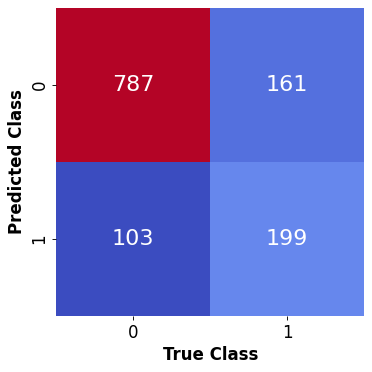

In [ ]:
# evaluamos las predicciones del modelo en el conjunto de prueba

# generamos reporte de clasificacion
print('- \033[1mReporte de Clasificación\033[0m')
print()
print(classification_report(y_test, best_model.predict(X_test)))

print('- \033[1mMatriz de Confusión\033[0m')
# generamos matriz de confusión
plt.figure(figsize=(10, 5), dpi=80)
mat = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', annot_kws={'size':20})
plt.tick_params(labelsize=15)
plt.xlabel('True Class', fontweight='bold', fontsize=15)
plt.ylabel('Predicted Class', fontweight='bold', fontsize=15)
plt.show() ;

---
## 6. INTERPRETABILIDAD
---

Para este trabajo, se plantea el uso de medidas de interpretabilidad a nivel tanto global como local. Por un lado, "Giturra" se podría ver beneficiado de conocer el aporte global de los features disponibles ya que esto le permitiría entender qué tanto "pesa" cada variable en la predicción de si el crédito debiera ser aprobado o rechazado. Lo anterior le permitiría, además, evaluar si el modelo es coherente con el negocio.

Por otro lado, el uso de medidas de interpretabilidad local permitirá a "Giturra" ofrecer explicaciones caso a caso respecto al por qué un crédito le fue rechazado a un cliente en particular. Lo anterior es importante ya que, entre otras cosas, el banco debe ser capaz no sólo de ofrecer explicaciones al cliente sobre por qué su crédito fue rechazado sino que también permitiría analizar con mayor detalle posibles sesgos que el modelo pudiera estar cometiendo en casos específicos.

### 6.0 Re-entrenamiento del mejor modelo

Para comenzar, se recuperarán los mejores parámetros obtenidos para el LGBMClassifier usando `optuna`. Con estos se volverá a entrenar el modelo para obtener, a partir de él, las medidas de interpretabilidad deseadas.

### 6.1 Interpretabilidad global

In [ ]:
# ajustamos el explainer
explainer = shap.TreeExplainer(best_model.steps[-1][1])

# calculamos los shap values
X_new = pipe[:-1].fit_transform(X)
X_new.columns = [c[10:] for c in X_new.columns]
shap_values = explainer.shap_values(X_new)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


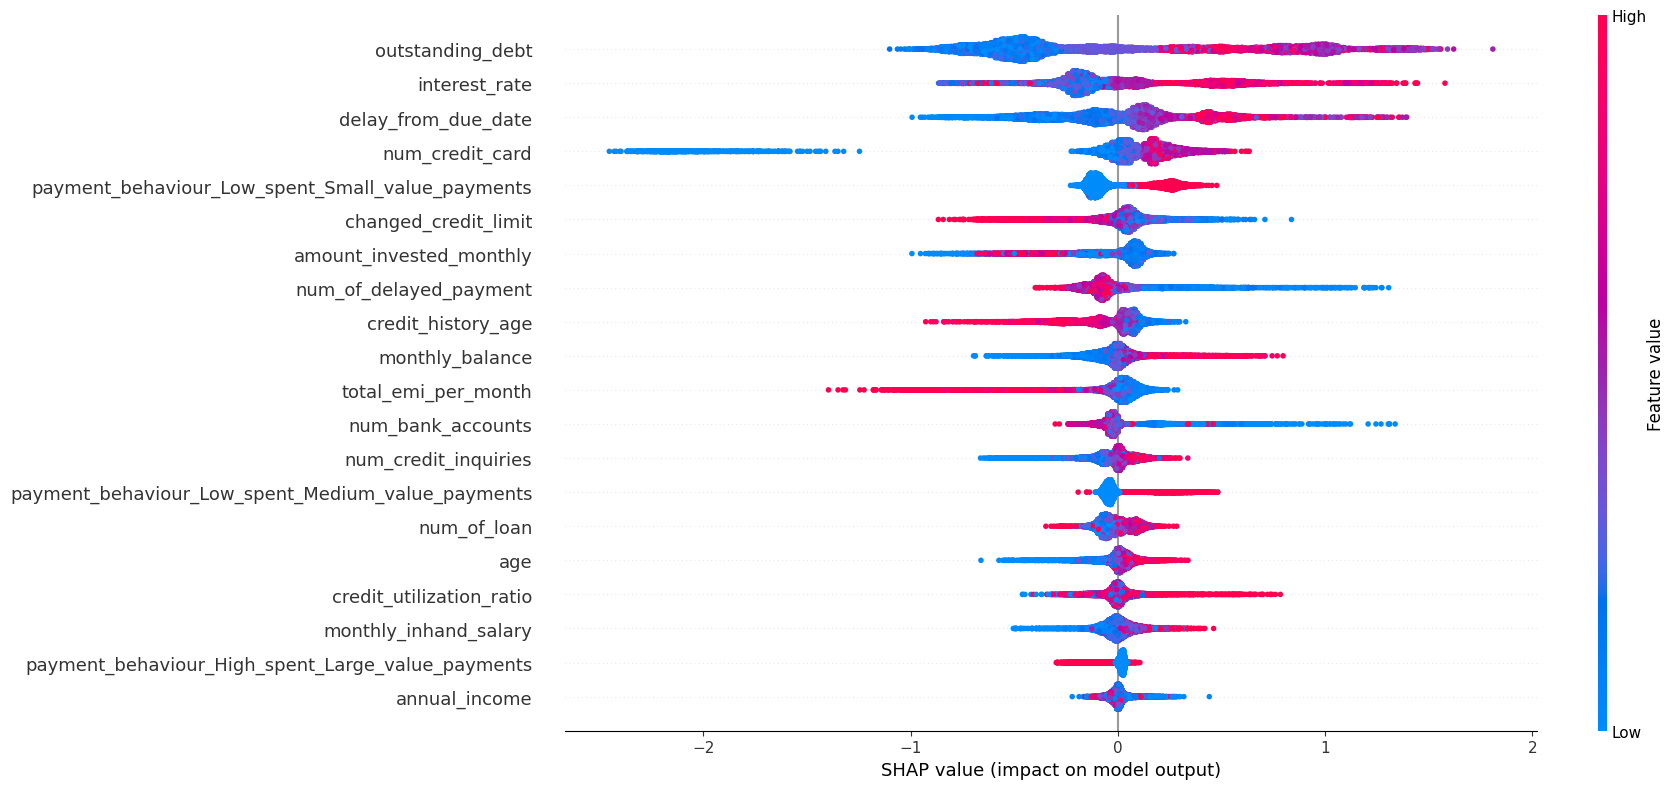

In [ ]:
# SHAP Values para credit_score=1
shap.summary_plot(shap_values[1], X_new, plot_size=(18,8))

El gráfico anterior muestra el aporte global de cada feature en la predicción de cada clase. A partir de esto se pueden observar dos cosas:

1. Los atributos ordenados por impacto en el modelo en forma descendiente. Con esto se pueden identificar cuáles son los atributos más importantes en la predicción del riesgo crediticio. Por ejemplo, en este caso se concluye que los cinco atributos más relevantes son, en orden de mayor a menor impacto: deuda pendiente, tasa de interés del crédito, atrasos en el pago, número de tarjetas de crédito y un comportamiento de pago del tipo bajo gasto - bajo monto de pago.

2. La diferencia en el impacto de cada variable sobre la predicción de una u otra clase. Por ejemplo, se observa que un bajo número de tarjetas de crédito predice fuertemente la ausencia de riesgo crediticio, mientras que valores altos de tasa de interés o deuda pendiente predicen con mayor probabilidad el riesgo crediticio.

### 6.2 Interpretabilidad local

En esta sección se presentan los shap values correspondientes a cinco casos seleccionados al azar. El objetivo de esto es explorar el impacto de cada atributo en la predicción de casos particulares, lo que permite entender de mejor manera cómo los distintos atributos aportan a la predicción final de casos particulares. Esto se relaciona directamente con la necesidad de comprender los alcances del modelo a la hora de explicar a los clientes las decisiones que "Giturra" tomó en cada caso.

In [ ]:
random.seed(123)
idx = []
for i in range(10):
    idx.append(random.randint(0, len(X_new) - 1))
print('Registros a usar como ejemplo para force plots:')
print(idx)

Registros a usar como ejemplo para force plots:
[857, 4385, 1428, 6672, 4367, 1764, 625, 6211, 8785, 9213]


A continuación se presentarán tres force plots para cinco casos seleccionados al azar. En ellos se explorará 1) la diferencia entre el valor base (predicción aplicada a todos los casos antes de tomar en cuenta el aporte de los atributos) y el valor predicho, y 2) el impacto de cada atributo en la predicción final, incluyendo su magnitud y dirección.
Cabe destacar que los valores presentados en los gráficos, correspondientes a los valores de los atributos, son el resultado de las transformaciones aplicadas en el preprocesamiento, por lo que las interpretaciones se realizarán en ese contexto y apuntarán principalmente a la magnitud y dirección del aporte de cada atributo a la predicción final del modelo.

#### Caso N°1

Force Plot para caso número 857


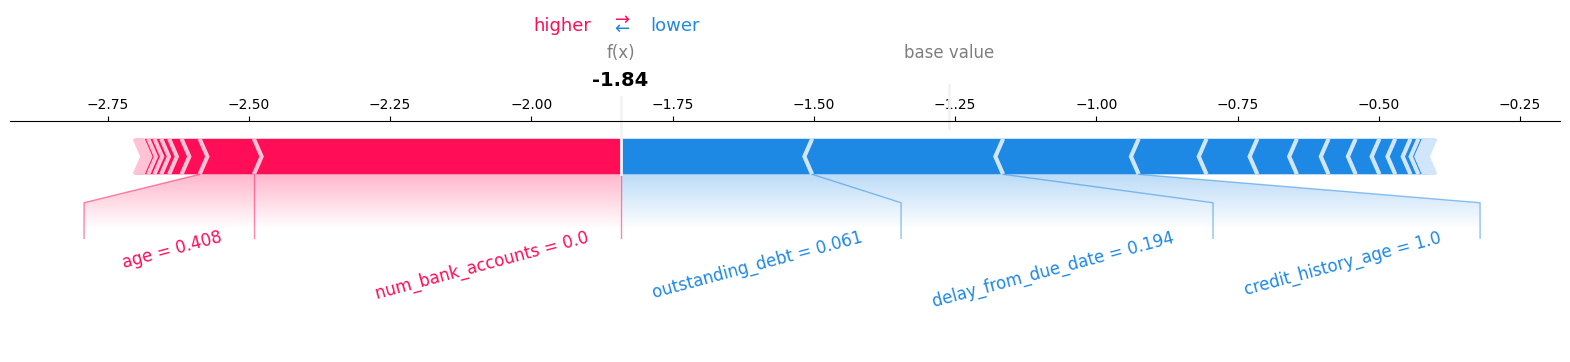

In [ ]:
print(f'Force Plot para caso número {idx[0]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[0]],3),
    np.round(X_new.iloc[idx[0]],3),
    text_rotation=15,
    matplotlib=True
)

#### Caso N°2

Force Plot para caso número 4385


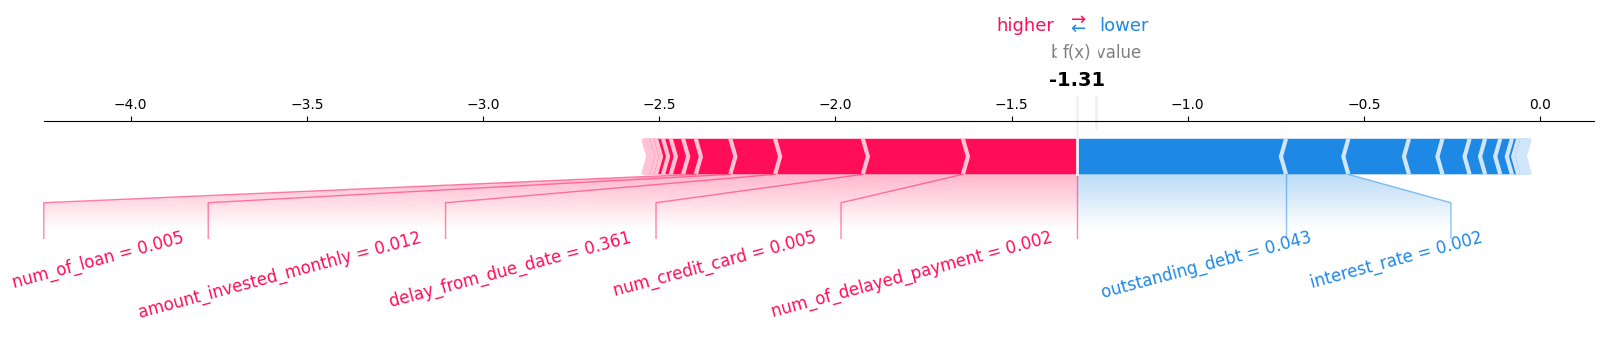

In [ ]:
print(f'Force Plot para caso número {idx[1]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[1]],3),
    np.round(X_new.iloc[idx[1]],3),
    text_rotation=15,
    matplotlib=True
)

En este caso, la predicción del riesgo crediticio para el cliente es ligeramente más alta que el valor base, lo que indica un riesgo ligeramente incrementado. Los atributos que más influyen en aumentar la probabilidad de riesgo son el retraso desde la fecha de vencimiento ('delay_from_due_date'), con la mayor contribución positiva, seguido por el número de tarjetas de crédito ('num_credit_card') y el número de pagos atrasados ('num_of_delayed_payment'), ambos también contribuyendo positivamente pero en menor medida. En contraste, la deuda pendiente ('outstanding_debt') y la tasa de interés ('interest_rate') son los factores que más contribuyen a disminuir la probabilidad de riesgo, indicando que a mayor deuda pendiente y tasa de interés en este caso, menor es el riesgo crediticio predicho.

#### Caso N°3

Force Plot para caso número 1428


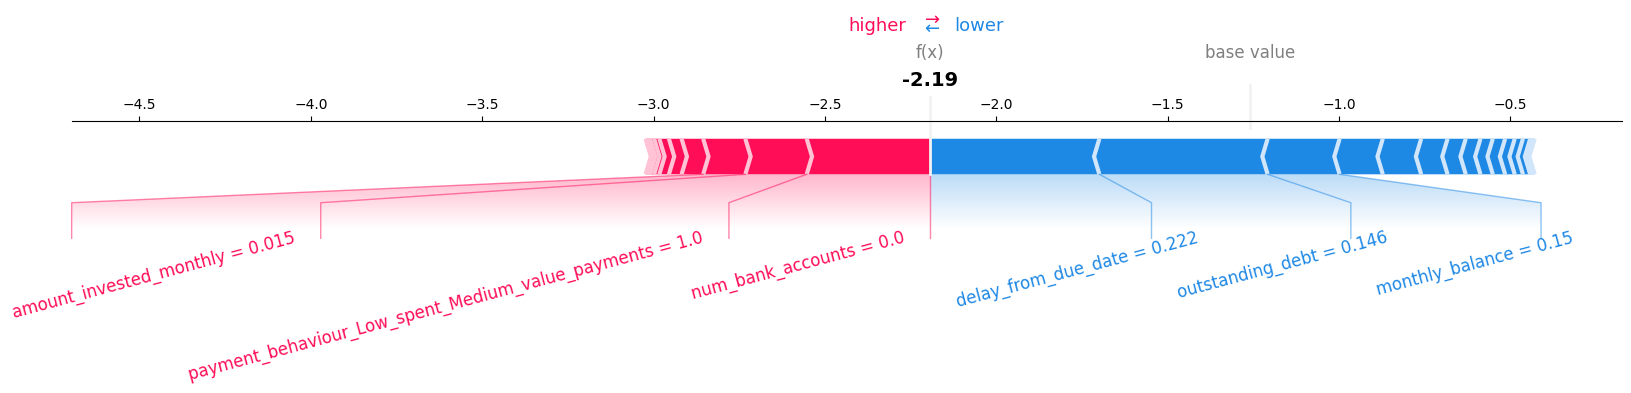

In [ ]:
print(f'Force Plot para caso número {idx[2]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[2]],3),
    np.round(X_new.iloc[idx[2]],3),
    text_rotation=15,
    matplotlib=True
)

En el Force Plot presentado, la predicción de riesgo crediticio para este cliente es más baja que el valor base, lo que implica un riesgo menor al promedio. El atributo que más incrementa la probabilidad de un mayor riesgo crediticio es 'num_bank_accounts', a pesar de que el valor del atributo se muestra como cero. Esto indica que la presencia de múltiples cuentas bancarias está asociada con un aumento en el riesgo crediticio en este modelo.

Los atributos que reducen la probabilidad de riesgo crediticio son 'delay_from_due_date', 'outstanding_debt' y 'monthly_balance'. 'delay_from_due_date' y 'outstanding_debt' parecen ser los más influyentes en reducir la predicción de riesgo, lo cual sugiere que .


#### Caso N°4

Force Plot para caso número 6672


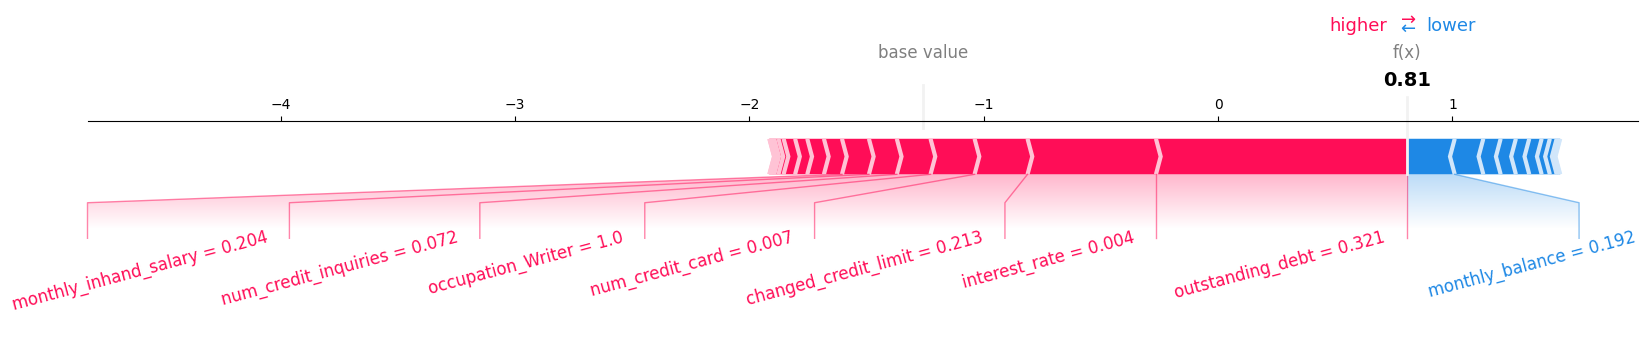

In [ ]:
print(f'Force Plot para caso número {idx[3]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[3]],3),
    np.round(X_new.iloc[idx[3]],3),
    text_rotation=15,
    matplotlib=True
)

El Force Plot muestra la contribución de distintas variables a la predicción de riesgo crediticio para el caso número 6672. La predicción del modelo está por encima del valor base, indicando un mayor riesgo crediticio comparado con el promedio luego de considerar el aporte individual de los atributos a la predicción.

Los factores que más incrementan la probabilidad de riesgo más alto corresponden a 'outstanding_debt' e 'interest_rate', lo que es coherente con los shap values globales presentados anteriormente en este informe.

Por otro lado, 'monthly_balance' tiene la mayor influencia negativa en la predicción de riesgo crediticio. De este modo, para esta persona se observa que 'outstanding_debt' e 'interest_rate' son los atributos que más contribuyen al riesgo crediticio, aunque para esta persona pareciera ser que su ingreso mensual disminuye un poco la predicción de riesgo. No obstante, la predicción del modelo sigue siendo mayor a la predicción base (antes de considerar el aporte de los atributos).

#### Caso N°5

Force Plot para caso número 4367


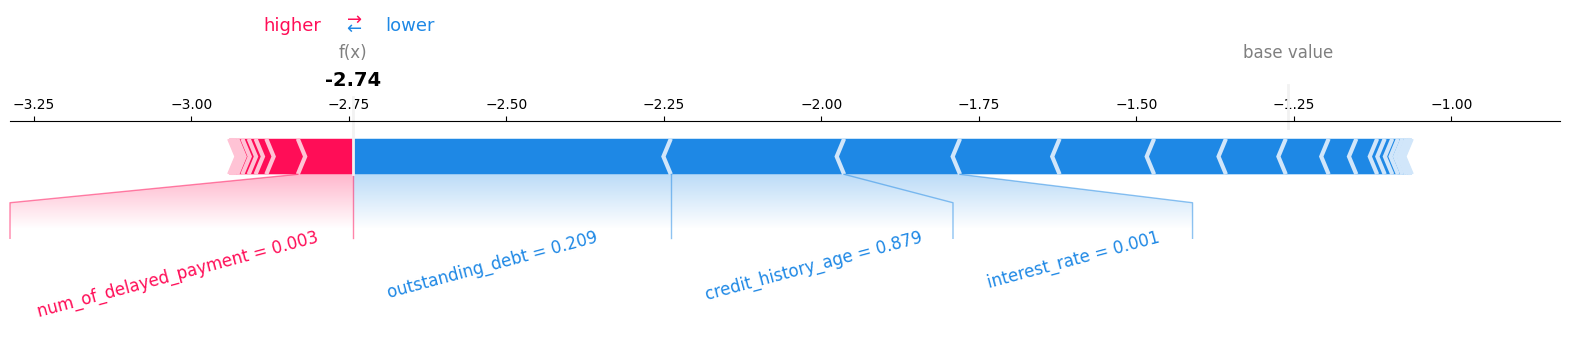

In [ ]:
print(f'Force Plot para caso número {idx[4]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[4]],3),
    np.round(X_new.iloc[idx[4]],3),
    text_rotation=15,
    matplotlib=True
)

En el caso número 5, se observa una predicción de riesgo menor al valor de base, lo cual es explicado por el aporte de algunas de las variables más influyentes del modelo, tales como 'outstanding_debt' e 'interest_rate', las cuales contribuyen a un menor riesgo crediticio. Adicionalmente, en este caso influye también la edad del historial de crédito de la persona.
Por otro lado, se observa que la probabilidad sube un poco más al tener en cuenta el número de pagos atrasados. Incluso con lo anterior, la predicción de riesgo es menor al promedio, donde el historial de crédito y la deuda pendiente son los atributos que más reducen el riesgo en este caso.

#### Caso N°6

Force Plot para caso número 1764


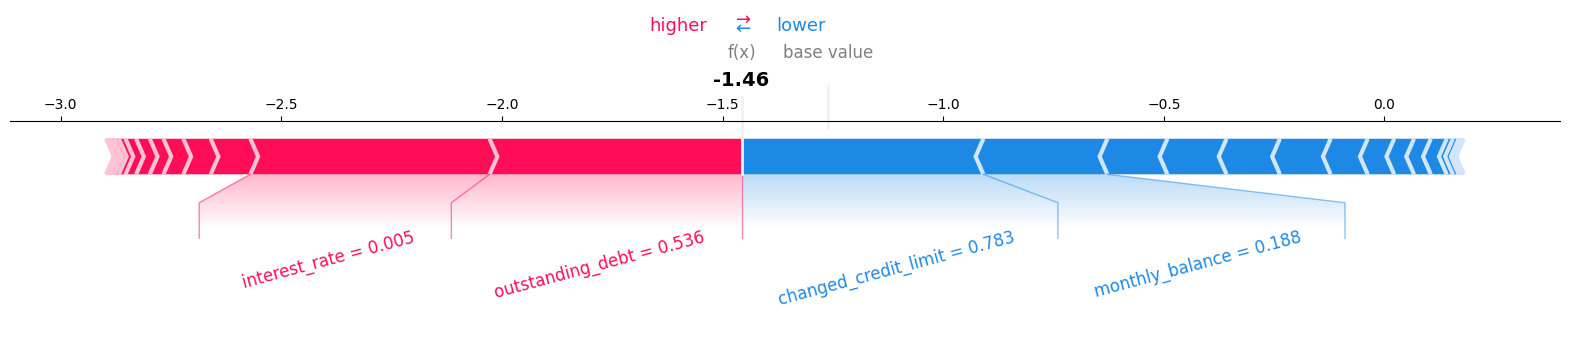

In [ ]:
print(f'Force Plot para caso número {idx[5]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[5]],3),
    np.round(X_new.iloc[idx[5]],3),
    text_rotation=15,
    matplotlib=True
)

Para este caso se observa una predicción similar al valor de base, donde distintos atributos contribuyen de forma similar en ambas direcciones. Sin embargo, se observa una tendencia a un menor riesgo respecto al promedio.
Si bien la tasa de interés y la deuda pendiente de la persona son lo que más incrementan su riesgo crediticio, este se ve reducido o compensado por su cambio en el límite de crédito y su ingreso mensual, los que llevan a predecir un riesgo menor a lo esperado antes de tener en cuenta el aporte de los atributos al modelo.

#### Caso N°7

Force Plot para caso número 625


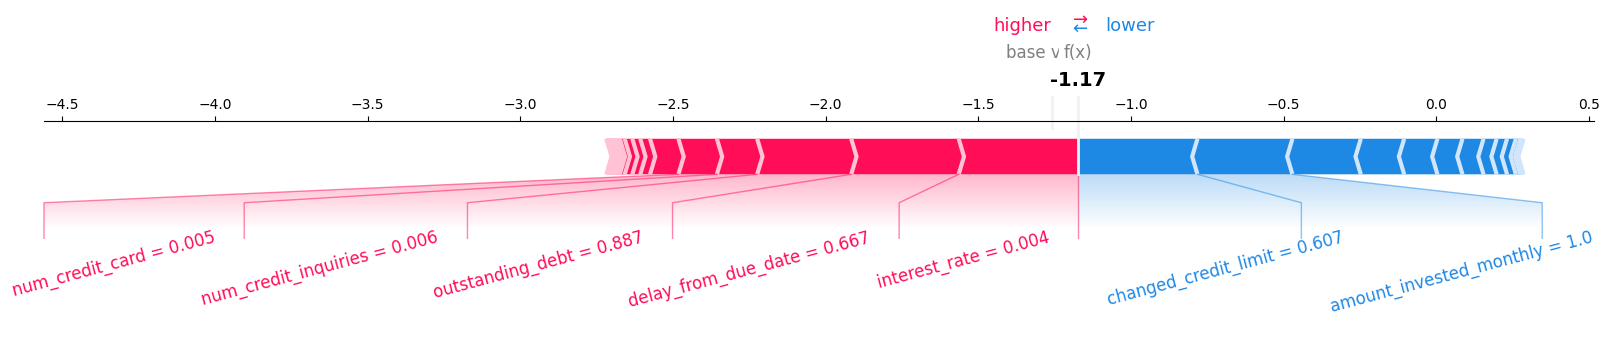

In [ ]:
print(f'Force Plot para caso número {idx[6]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[6]],3),
    np.round(X_new.iloc[idx[6]],3),
    text_rotation=15,
    matplotlib=True
)

En el caso 7 se observa un valor predicho ligeramente mayor al valor base, por lo que el aporte de los atributos no cambiaría mucho la predicción realizada antes de tenerlos en cuenta. Sin embargo, explremos cómo los distintos atributos empujan la predicción en ambos sentidos hasta alcanzar un equilibrio cercano al valor inicial.

Aquí, la probabilidad de riesgo se ve incrementada principalmente por 'interest_rate', 'delay_from_due_date' y 'outstanding_debt', las que coinciden con ser algunos de los atributos con más influencia en la predicción de acuerdo con el análisis global de shap values.

Por otro lado, el riesgo de esta persona se ve disminuido por sus valores en 'changed_credit_limit' y 'amount_invested_monthly'.

#### Caso N°8

Force Plot para caso número 6211


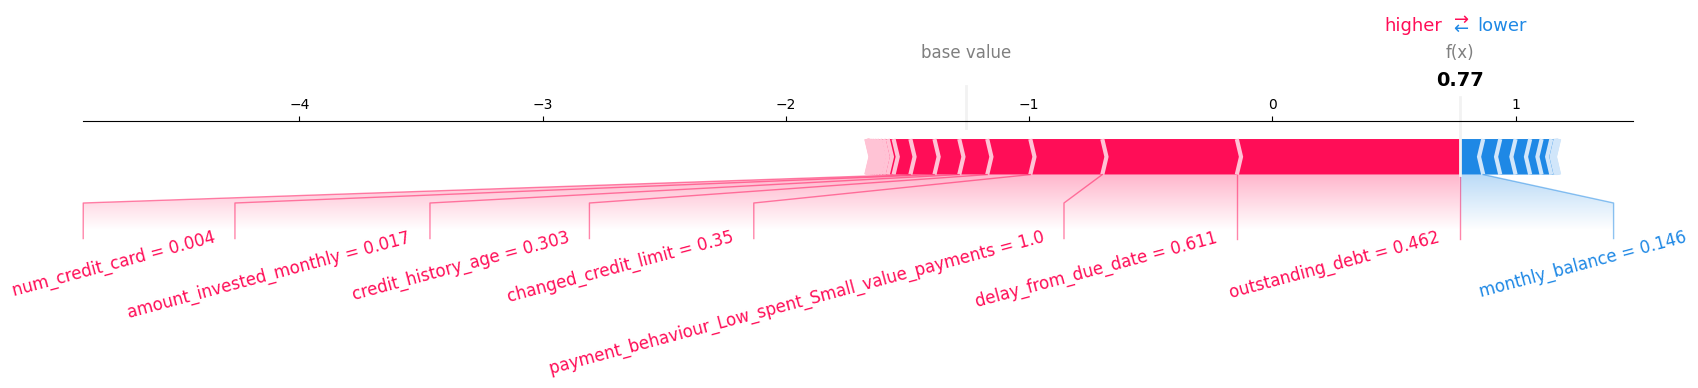

In [ ]:
print(f'Force Plot para caso número {idx[7]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[7]],3),
    np.round(X_new.iloc[idx[7]],3),
    text_rotation=15,
    matplotlib=True
)

Para esta persona se observa un valor predicho por el modelo mayor al valor base, donde la mayoría de la contribución de los atributos es en dirección hacia un mayor riesgo.
Aquí, de forma coherente con casos anteriores y con los shap values globales, los atributos que más contribuyen a la elevada predicción de riesgo son 'outstanding_debt', 'delay_from_due_date' y 'payment_behaviout_Low_spent_Small_value_payments'.
También se observa una ligera contribución hacia una menor predicción de riesgo, de las cuales la más notable está dada por 'monthly_balance'. Sin embargo, esta contribución individual es más pequeña que la de cualquiera de los cinco atributos de mayor contribución hacia una mayor predicción de riesgo (atributos en rojo).

#### Caso N°9

Force Plot para caso número 8785


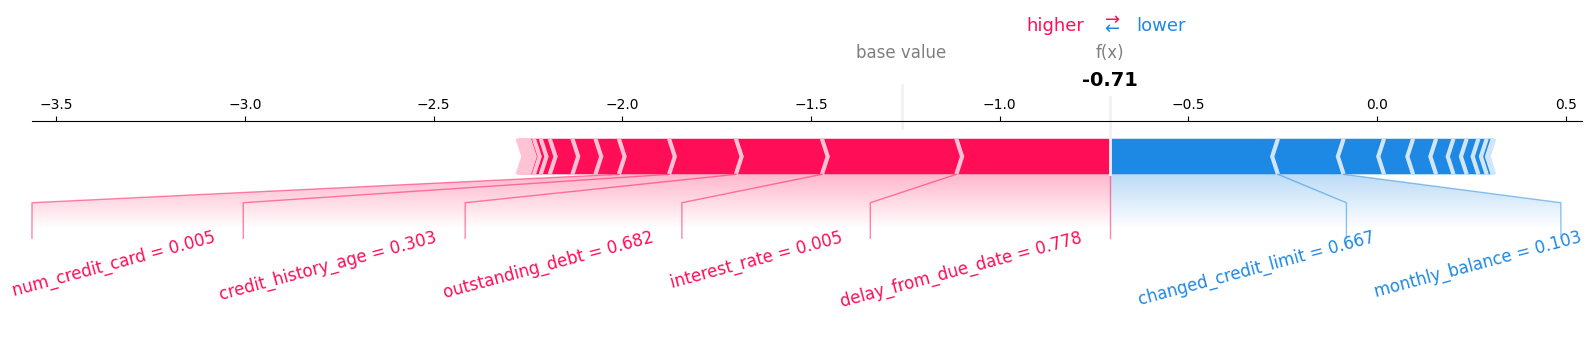

In [ ]:
print(f'Force Plot para caso número {idx[8]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[8]],3),
    np.round(X_new.iloc[idx[8]],3),
    text_rotation=15,
    matplotlib=True
)

Para este caso se observa algo similar a otros revisados anteriormente, donde hay una mayor probabilidad de predecir riesgo crediticio y esto se encuentra apoyado principalmente por 'delay_from_due_date', 'interest_rate' y 'outstanding_debt'.
Por otro lado, entre los aspectos que más contribuyeron a disiminuir la predicción de riesgo crediticio en esta persona se encuentran 'changed_credit_limit' y 'monthly_balance'.

#### Caso N°10

Force Plot para caso número 9213


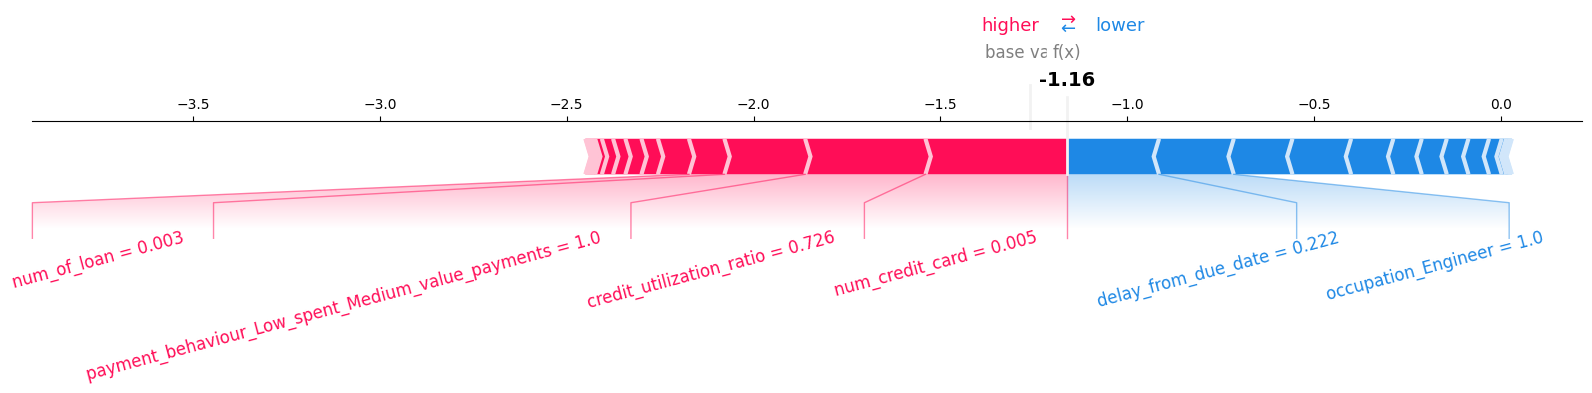

In [ ]:
print(f'Force Plot para caso número {idx[9]}')
shap.force_plot(
    np.round(explainer.expected_value[1],2),
    np.round(shap_values[1][idx[9]],3),
    np.round(X_new.iloc[idx[9]],3),
    text_rotation=15,
    matplotlib=True
)

En este caso, el modelo hace una predicción no muy distinta al valor base, donde distintos atributos contribuyen en una u otra dirección hasta alcanzar un balance en torno a este punto inicial.

Aquí, el modelo predice un mayor riesgo a partir de los atributos 'num_credit_card', 'credit_utilization_ratio' y 'payment_behaviour_Low_spent_Medium_value_payments'.
Sin embargo, el riesgo se ve disminuido al considerar la interacción de dichos atributos con otros dos: 'delay_from_due_date' y 'occupation_Engineer'.


#### Conclusiones interpretabilidad local

La exploración de estos 10 casos permite comprender un poco mejor la forma en que los distintos atributos contribuyen a las predicciones del modelo. Mientras el gráfico global nos muestra el grado de aporte de cada atributo y la relación entre magnitud del atributo y aporte al modelo, los _force plots_ para la interpretabilidad local nos permiten explorar el comportamiento de estos atributos en el caso a caso, entender que los atributos de mayor aporte no son siempre los más importantes al predecir casos individuales y además profundizar en las interacciones entre atributos. Por ejemplo, ver cómo algunos atributos podrían aumentar el riesgo crediticio de un cliente al mismo tiempo que otros podrían mitigar dicho riesgo, haciendo que el modelo finalmente tenga una menor probabilidad de clasificar a dicho cliente como un cliente de riesgo.

Un comportamiento interesante tiene que ver con los atributos de mayor aporte del modelo, entre los cuales se encuentran 'outstanding_debt', 'delay_from_due_date', 'interest_rate', 'num_credit_card' y 'changed_credit_limit'. Por ejemplo, muchas veces ocurría que, cuando varios atributos aumentaban la probabilidad de predecir riesgo crediticio para una persona particular, esta probabilidad se veía mitigada o disminuida al considerar algunos de estos otros atributos. Esto muestra que, incluso si existieran factores de riesgo que se asocien a mayor riesgo crediticio, es posible que el riesgo efectivo del cliente sea menor si es que tiene buenos antecedentes en términos de deuda pendiente ('outstanding_debt'), porcentaje de cambio en el límite de crédito ('changed_credit_limit') o balance mensual ('monthly_balance'), lo que tiene sentido si se considera que una persona puede tener antecedentes que no le favorezcan a la hora de solicitar un crédito pero es capaz de compensarlo con, por ejemplo, una deuda baja y un alto porcentaje de cambio en el límite del crédito ('changed_credit_limit).

También estos gráficos permiten explorar ciertos sesgos del modelo, como se pudo observar en el caso de algunas profesiones. Por ejemplo, la persona del caso 4 era escritora ('occupation_Writer') y esto aportaba de manera importante a predecir un mayor riesgo crediticio. Si bien esto puede ser compensado con otros buenos antecedentes, como se mencionaba anteriormente, esto hacer que el escritor parta con cierta desventaja a la hora de optar a un crédito.
En el caso contrario tenemos al caso 10, correspondiente a una persona ingeniera ('occupation_Engineer'), donde esta ocupación hacía un fuerte aporte a una menor predicción de riesgo crediticio. Del mismo modo, quizás un ingeniero podría tener peores antecedentes en términos de deuda pendiente o balance mensual, pero el hecho de tener esta ocupación lo pone en ventaja al momento de someterse a evaluación para un crédito.
En un caso (1) también se observó una persona cuya la edad contribuía a una mayor predicción de riesgo crediticio, pese a tener buenos antecedentes que favorecían su evaluación crediticia.

Si bien es posible sostener que existe una asociación entre la ocupación del cliente y varios de sus otros antecedentes financieros, es necesario recordar que asociación no implica causalidad. No es posible asumir que un escritor será un cliente de mayor riesgo sólo por virtud de su ocupación sin antes considerar su contexto financiero completo. No ser conscientes de esto a la hora de hacer predicciones puede llevar a decisiones discriminatorias contra grupos específicos.

Estas medidas de interpretabilidad local permiten ofrecer explicaciones contextualizadas a casos individuales, junto con evaluar la posibilidad de que en ciertos casos el modelo esté tomando decisiones que se podrían considerar (positiva o negativamente) discriminatorias.


---
## 7. CONCLUSIÓN
---


De acuerdo con lo expuesto en el presente informe, se concluye lo siguiente:

- En este trabajo se ha construido un modelo predictivo de riesgo crediticio que le permite al agente económico "Giturra" reducir las posibles pérdidas generadas por contrapartes fraudulentas y, a su vez, mejorar la calidad de los préstamos que otorga.


- El desarrollo del EDA facilita el preprocesamiento de los datos, permitiendo comprender el comportamiento y distribución de las variables categóricas y numéricas constituyentes del archivo `dataset.pq`, ayudando a tomar las decisiones más apropiadas para el preprocesamiento de datos, incluyendo la transformación de atributos y el manejo de datos nulos. Por ejemplo, la decisión de imputar los datos nulos proviene desde los hallazgos del EDA, donde se encontró que el porcentaje de registros con algún dato faltante ascendía a 36%.


- Una vez preprocesado el Dataset, se reconoce que el desempeño de los ocho baseline evaluados se encuentra, en términos de la métrica objetivo, entre `Recall=0.272` (modelo `DummyClassifier`) y `Recall=0.544` (modelo `LGBMClassifier`), con tiempos de ejecución	entre 0.043 s (modelo `DummyClassifier`) y 3.229 s (modelo `SVC`).


- En cuanto a los estudios de optimización con `Optuna`, se logra mejorar ligeramente el desempeño de los baseline `LGBMClassifier` y `RandomForestClassifier`. Por un lado, se obtiene un incremento desde `Recall=0.54` a `Recall=0.57` para el modelo
`LGBMClassifier`, mientras que, por otro lado, un incremento desde `Recall=0.52` a `Recall=0.54` para el modelo `RandomForestClassifier`, resultando, por tanto, en una mejora marginal para los baseline de clasificación con respecto a sus optimizaciones.


- Si bien se pudo resolver exitosamente el problema de clasificación con el modelo `LGBMClassifier` (en el sentido que este es mejor que el azar), se considera que el resultado obtenido es parcialmente aceptable, pues, el valor de la métrica objetivo en el conjunto de prueba (`Recall=0.55` para la predicción de la etiqueta `credit_score=1`) se encuentra 45 puntos porcentuales por debajo de un desempeño perfecto (`Recall=1.00`).


- Entre los atributos con mayor aporte a las predicciones del modelo se encuentran deuda pendiente ('outstanding_debt'), tasa de interés ('interest_rate'), retraso desde la fecha de vencimiento ('delay_from_due_date') y número de tarjetas de crédito ('num_credit_card'). En este modelo, valores bajos en estos atributos estarían asociados con un menor riesgo crediticio. Sin embargo, al explorar el impacto de cada atributo a nivel individual, el modelo mostró algunos comportamientos que tienen el potencial de introducir sesgos en las predicciones, relacionados con la ocupación o la edad de los clientes. Es importante tener esto en consideración a la hora de utilizar el modelo, con el objetivo de evitar tomar decisiones que puedan resultar discriminatorias o poco deseables en un contexto de búsqueda de equidad e inclusión.


- Como equipo de trabajo, nos encontramos conformes con los resultados obtenidos y presentados en este informe. Sin embargo, se considera que la solución al problema de clasificación podría ser mejorada, por ejemplo, abordándola a través de un modelo de red neuronal que sea capaz de captar aquellas interacciones no lineales entre las variables predictoras.


- Finalmente, durante el desarrollo del proyecto de Data Science, se aprendió a implementar un `Pipeline` para preprocesar datos y ajustar un algoritmo de clasificación, se reconoció la importancia de las variables predictoras en la interpretabilidad del modelo y se valoró la generación de un modelo de Machine Learning para resolver un problema de clasificación con categorías desbalanceadas.


- Cabe señalar que, dada la fecha límite de entrega del proyecto, no fue posible desarrollar un proceso de *Feature Engineering* con los datos disponibles ni implementar otros modelos de mayor complejidad (*e.g.* modelos de redes neuronales). Así, se considera que hubiese sido enriquecedor, en términos de experiencia en el área de Data Science, el haber podido desarrollar ambas tareas.





<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>